<a href="https://colab.research.google.com/github/lailyafiah/lailyafiah.github.io/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from google.colab.patches import cv2_imshow

%matplotlib inline

In [ ]:
cv.__version__

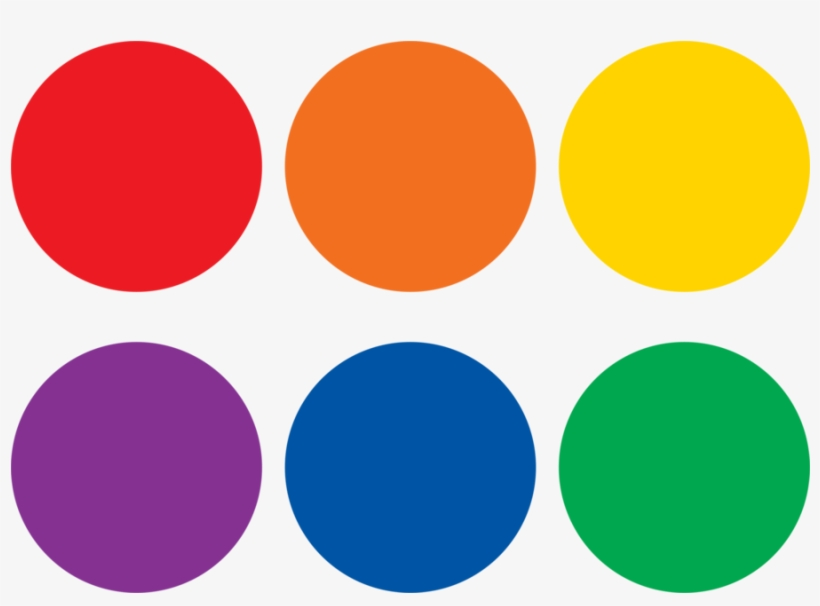

<function matplotlib.pyplot.show>

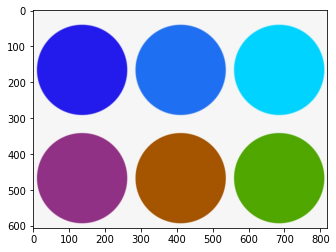

In [ ]:
circle = cv.imread('circles.png')
cv2_imshow(circle)
img = cv.cvtColor(circle, cv.COLOR_BGR2RGB)
plt.imshow(circle)
plt.show

In [ ]:
type(circle)

In [ ]:
circle.shape

In [ ]:
h,w,c = circle.shape
h,w,c

Akses Citra per Channel

In [ ]:
circle[:,:,0].shape

(606, 820)

In [ ]:
circle[:,:,1].shape

(606, 820)

In [ ]:
circle[:,:,2].shape

(606, 820)

In [ ]:
B,G,R=cv.split(circle)

print("Blue Channel")
cv2_imshow(B)
print("Green Channel")
cv2_imshow(G)
print("Red Channel")
cv2_imshow(R)

In [ ]:
image_gray=cv.cvtColor(circle,cv.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
img=cv.cvtColor(circle,cv.COLOR_)

Image Cropping

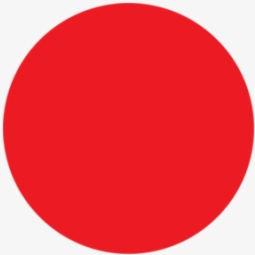

In [ ]:
patch = (255,255)
center = (135,165)

crop_image = cv.getRectSubPix(circle, patch, center)
cv2_imshow(crop_image)

Image Rotation

In [ ]:
center = circle.shape[1]/2,circle.shape[0]/2
angle = 30
scale = 0.5

M=cv.getRotationMatrix2D(center, angle, scale)

rotate = cv.warpAffine(circle, M, (int(circle.shape[1]*1.3), int(circle.shape[0]*1.3)), borderValue=(255,255,255))
cv2_imshow(circle)
cv2_imshow(rotate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


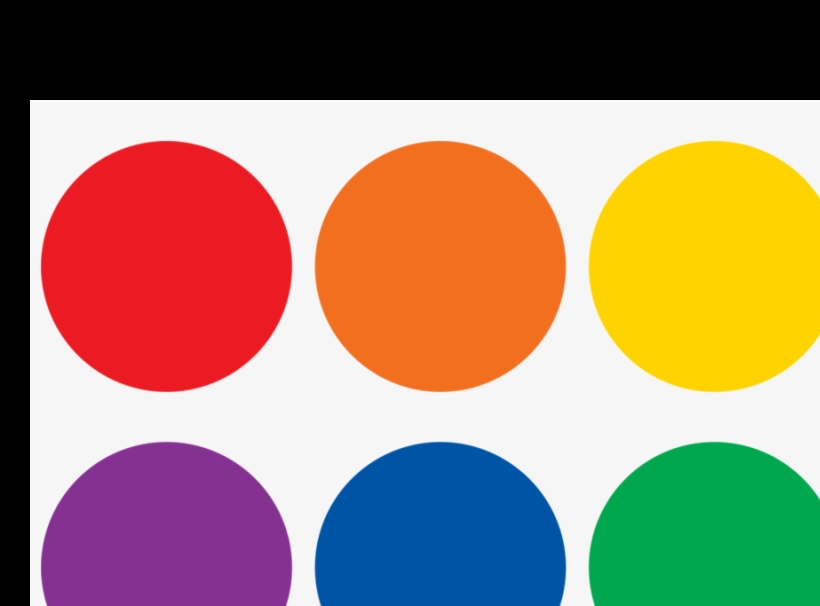

In [ ]:
shift = cv.warpAffine(circle, 
                      np.array([[1,0,30],
                                [0,1,100]],
                                dtype = np.float), dsize=(circle.shape[1],circle.shape[0]))
cv2_imshow(shift)

Image Resize

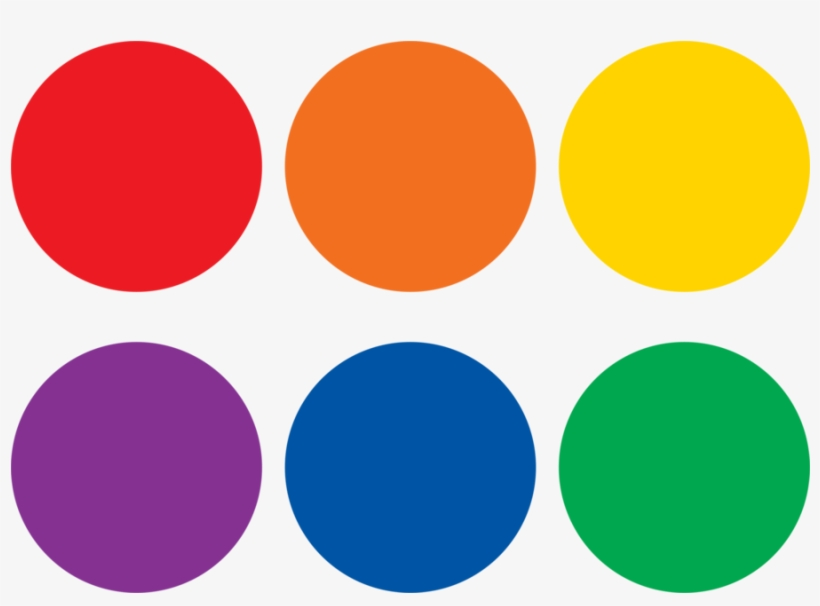

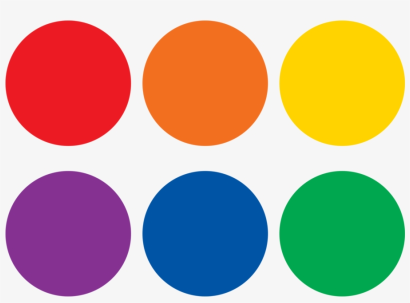

In [ ]:
width,height = int(circle.shape[1]*0.5), int(circle.shape[0]*0.5)
resize = cv.resize(circle, (width,height), interpolation = cv.INTER_AREA, )

cv2_imshow(circle)
cv2_imshow(resize)

Image Flipping

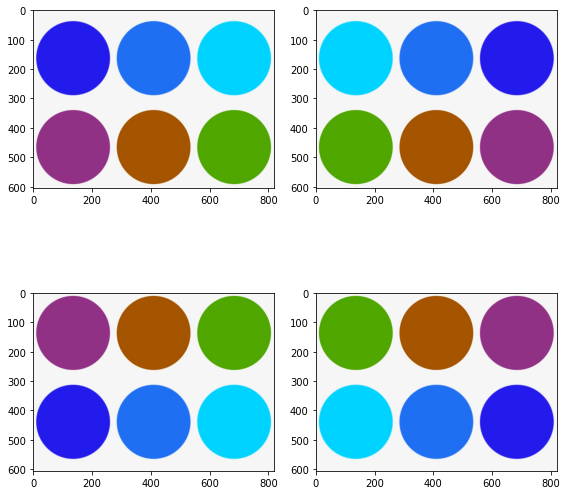

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (8,8))

fig.tight_layout()

axes = axes.ravel()
axes[0].imshow(circle)
axes[1].imshow(circle[:,::-1, :])
axes[2].imshow(circle[::-1,:, :])
axes[3].imshow(circle[::-1,::-1, :])

Image Padding

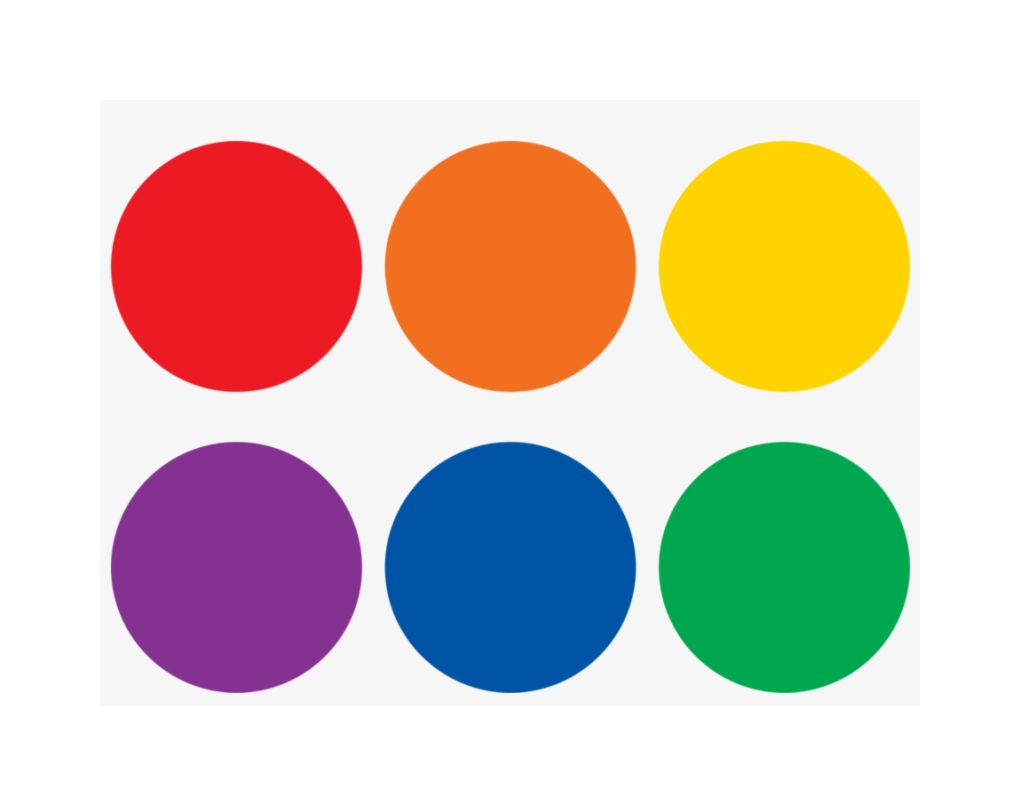

In [ ]:
bordersize = 100
color = [255,255,255]
border=cv.copyMakeBorder(circle, 
                         top=bordersize, bottom = bordersize,
                         left=bordersize, right = bordersize,
                         borderType = cv.BORDER_CONSTANT,
                         value= color)
cv2_imshow(border)

Log transform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


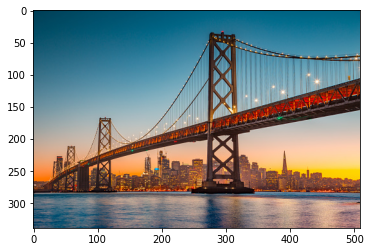

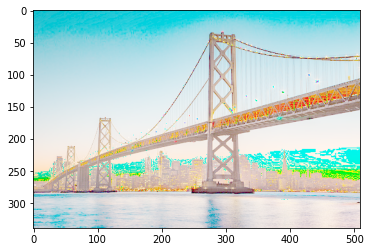

In [ ]:
SF = cv.imread('SanFrancisco.jpg')

SF= cv.cvtColor(SF,cv.COLOR_BGR2RGB)

#Apply log transform to image
c = 255/np.log(1+np.max(SF))
log_SF = c*(np.log(SF+1))

#convert float value to int
log_SF = np.array(log_SF,dtype = np.uint8)

plt.imshow(SF)
plt.show()
plt.imshow(log_SF)
plt.show()

Gamma Transformation

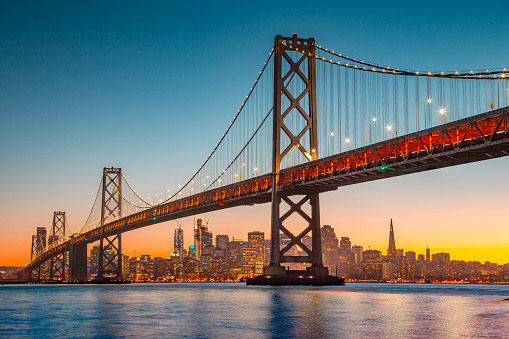

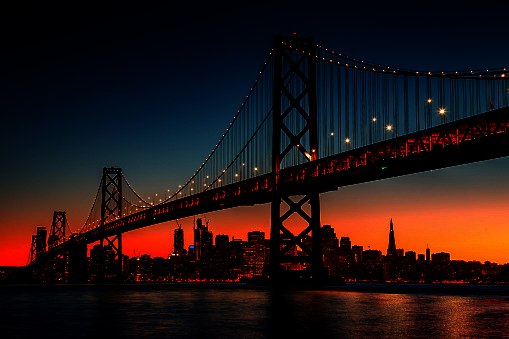

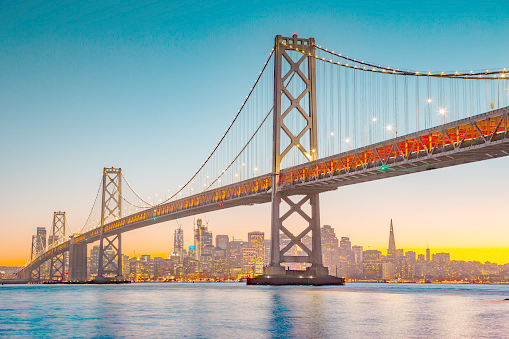

In [ ]:
def GammaCorrection(src, gamma):
  invGamma = 1/gamma
  
  #Create Lookup Table
  table = [((i/255)**invGamma)*255 for i in range(256)]
  table = np.array(table, np.uint8)

  return cv.LUT(src,table)

SF = cv.imread('SanFrancisco.jpg')
smallgamma_SF = GammaCorrection(SF, 0.2)
biggamma_SF = GammaCorrection(SF,2.0)
cv2_imshow(SF)
cv2_imshow(smallgamma_SF)
cv2_imshow(biggamma_SF)

Histogram Equalization

In [ ]:
#Read Image
HaB = cv.imread('Unequalized_Hawkes_Bay_NZ.jpg')

HaB = cv.cvtColor(HaB, cv.COLOR_BGR2GRAY)

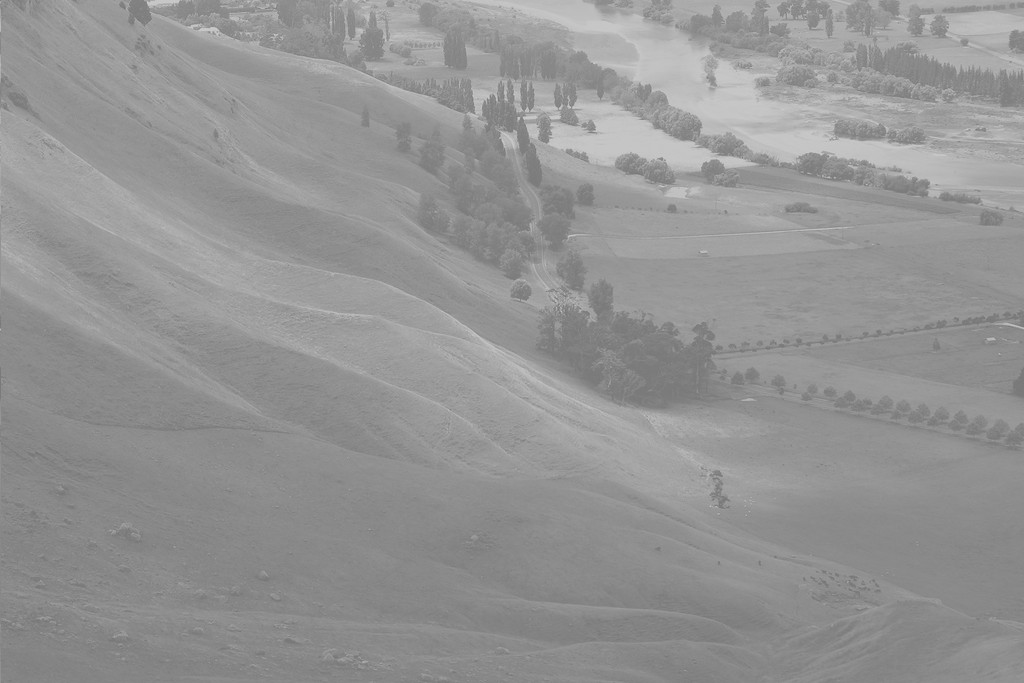

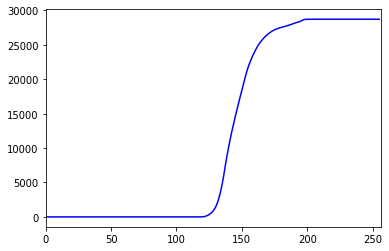

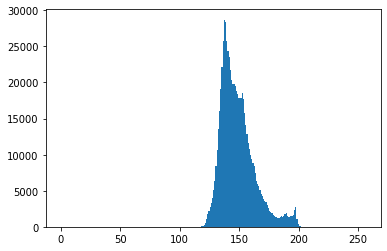

In [ ]:
hist,bins = np.histogram(HaB,256,[0,256])

cf=hist.cumsum()
cf_normalized = cf*hist.max()/cf.max()

plt.plot(cf_normalized,color = 'b')
plt.xlim([0,256])
cv2_imshow(HaB)
plt.show()
plt.hist(HaB.ravel(),bins = 256, range = [0,256])
plt.show()

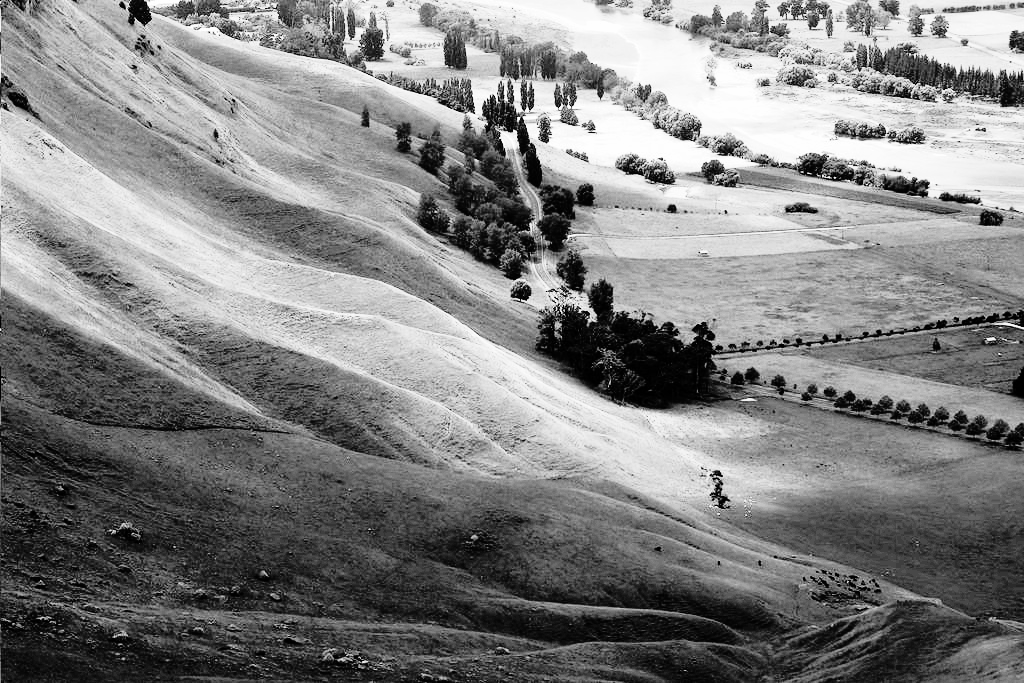

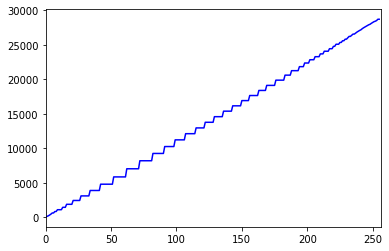

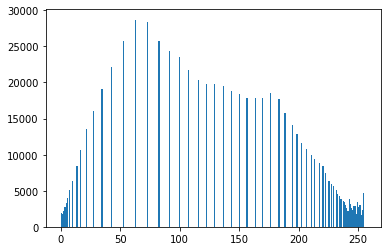

In [ ]:
cf_m = np.ma.masked_equal(cf,0)
cf_m = (cf_m - cf_m.min())*255/(cf_m.max()-cf_m.min())
cf = np.ma.filled(cf_m,0).astype('uint8')

equ = cf[HaB]

hist,bin = np.histogram(equ,256,[0,256])
cf_eq = hist.cumsum()
cf_eq_normalized = cf_eq*float(hist.max())/cf_eq.max()

plt.plot(cf_eq_normalized,color = 'b')
plt.xlim([0,256])
cv2_imshow(equ)
plt.show()
plt.hist(equ.ravel(),bins=256, range = [0,256])
plt.show()

Image Filtering

In [ ]:
SF= cv.imread('San Francisco')



Low Pass Filter/Blurring/Gaussian Blur

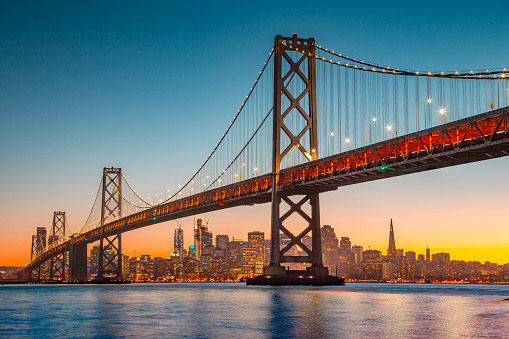

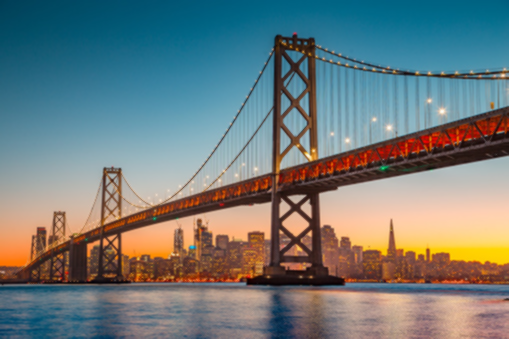

In [ ]:
buff = SF.copy()

kernel = np.array([[1,1,1],
                   [1,4,1],
                   [1,1,1]])/12

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)

High Pass/Edge/Detection/Sobel

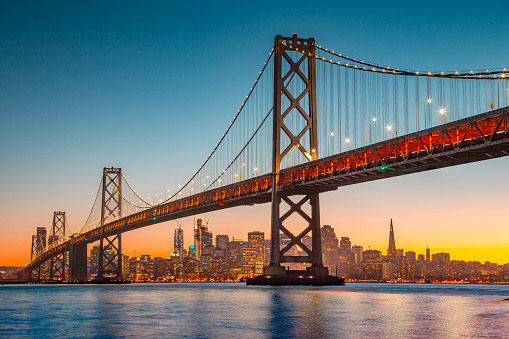

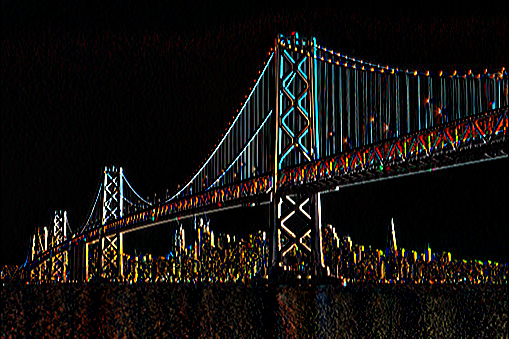

In [ ]:
buff = SF.copy()

kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)

band Stop Filter

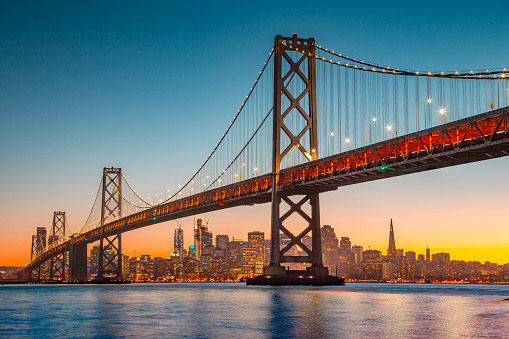

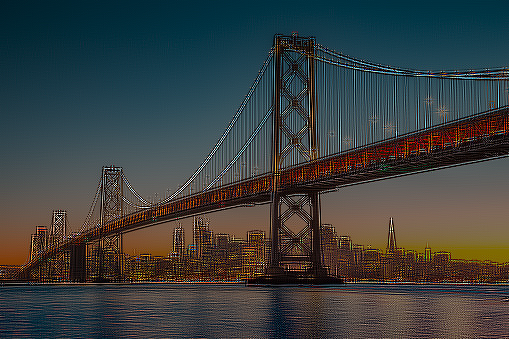

In [ ]:
buff = SF.copy()

kernel = np.array([[1,-1,1],
                   [-1,0.5,-1],
                   [1,-1,1]])

filtered = cv.filter2D(buff,-1,kernel)

cv2_imshow(SF)
cv2_imshow(filtered)